In [ ]:
import pandas as pd
# from tqdm import tqdm
import numpy as np
import cv2
import os
import shutil
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, models, transforms, utils
#from torchvision.transforms import v2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
from torchvision.datasets import ImageFolder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import torchsummary
from PIL import Image
from pathlib import Path
import pandas as pd
import numpy as np


# Handling images
from PIL import Image
import matplotlib.pyplot as plt

# Handling paths

import time

# Pytorch essentials
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
from torchvision.datasets import ImageFolder
import torchsummary



# Pytorch essentials for datasets.
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Pytorch way of data augmentation.
import torchvision
from torchvision import datasets, models, transforms, utils
#from torchvision.transforms import v2

import cv2
import os
from glob import glob
#from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
from tensorflow.keras.models import Sequential
import glob
import tensorflow
import cv2
#from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

2025-04-16 03:17:16.756393: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-16 03:17:17.330759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<Axes: xlabel='target', ylabel='count'>

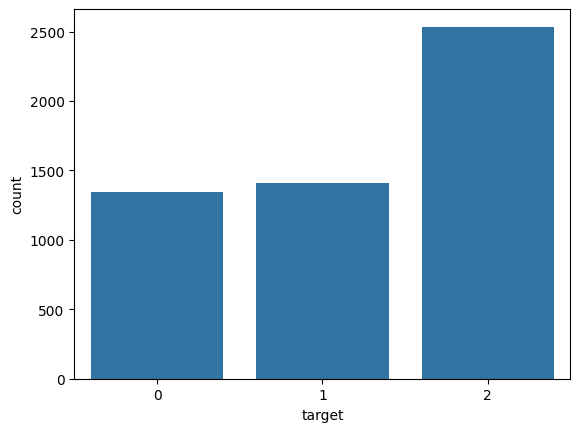

In [5]:
import pandas as pd
import seaborn as sns
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

sns.countplot(x = train['target'])

In [6]:
train['target'] = train['target'].astype(str)
test['target'] = test['target'].astype(str)


# ✅ Split the DataFrame

test_df = test
train_df, val_df= train_test_split(
    train,
    test_size=0.2,
    stratify=train['target'],
    random_state=42
    
)

# ✅ Create data generators
train_gen = ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.1,
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

val_gen = ImageDataGenerator(
    rescale=1/255,
    samplewise_center=True,
    samplewise_std_normalization=True
)


train_flow = train_gen.flow_from_dataframe(
    dataframe=train_df,
    directory='/home/evaberepiki/Downloads/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train',
    x_col="X_ray_image_name",
    y_col='target',
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    target_size=(320, 320)
)

val_flow = val_gen.flow_from_dataframe(
    dataframe=val_df,
    directory='/home/evaberepiki/Downloads/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train',
    x_col="X_ray_image_name",
    y_col='target',
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(320, 320)
)

Found 4227 validated image filenames belonging to 3 classes.
Found 1057 validated image filenames belonging to 3 classes.


In [7]:
test_flow = val_gen.flow_from_dataframe(
    dataframe=test_df,
    directory='/home/evaberepiki/Downloads/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test',
    x_col="X_ray_image_name",
    y_col='target',
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(320, 320)
)

Found 624 validated image filenames belonging to 3 classes.


In [ ]:
#Regular CNN model

model1 = Sequential()

# Convolutional layers
model1.add(Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same", input_shape=(320, 320, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(256, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())

# Fully connected layers
model1.add(Dense(128, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))

# Output layer for multi-class classification (3 classes)
model1.add(Dense(3, activation="softmax"))  # Changed to 3 units and softmax activation

model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 320, 320, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 160, 160, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 102400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    13,107,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,506,179 (51.52 MB)

 Trainable params: 13,506,179 (51.52 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [14]:
early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience = 15,
                                                                    restore_best_weights = True,
                                                                    verbose = 1)

In [42]:

history = model1.fit(
    train_flow, 
    epochs=20, 
    validation_data=val_flow, 
    callbacks=[early_stopping_callbacks], 
    verbose=1
)

/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.7994 - loss: 0.3005 - val_accuracy: 0.8205 - val_loss: 0.4108
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8065 - loss: 0.2887 - val_accuracy: 0.8157 - val_loss: 0.3663
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7918 - loss: 0.3017 - val_accuracy: 0.7452 - val_loss: 0.4615
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8031 - loss: 0.3003 - val_accuracy: 0.8574 - val_loss: 0.3382
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7999 - loss: 0.2971 - val_accuracy: 0.8333 - val_loss: 0.3513
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8163 - loss: 0.2811 - val_accuracy: 0.8237 - val_loss: 0.3220
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8162 - loss: 0.2801 - val_accuracy: 0.8766 - val_loss: 0.2781
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8118 - loss: 0.2829 - val_accu

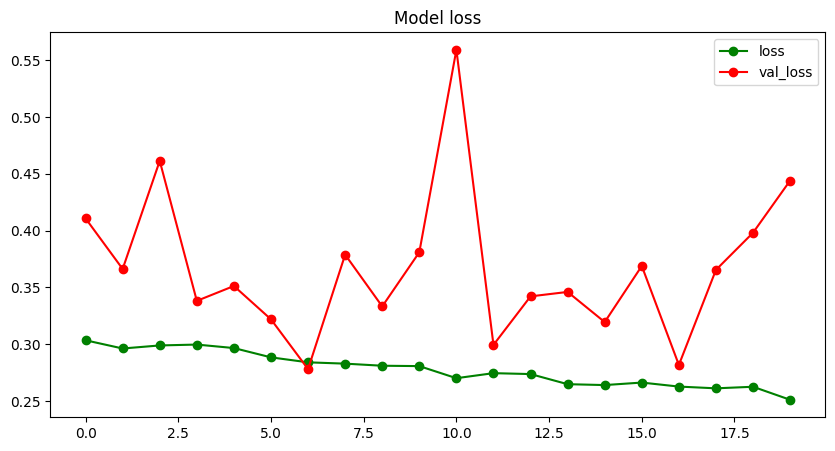

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()



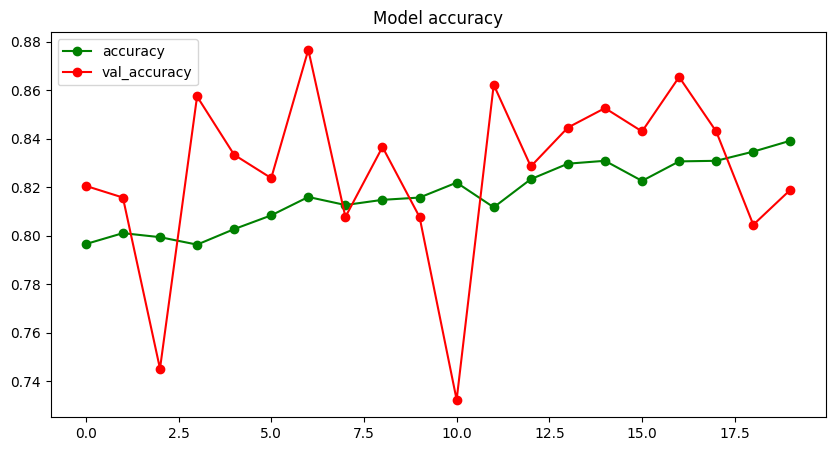

In [45]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")

plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()



In [46]:
test_loss, test_accuracy = model1.evaluate(test_flow, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8914 - loss: 0.2569
The testing accuracy is:  87.66025900840759 %
The testing loss is:  27.813440561294556 %


/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.5273783..2.0508394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5369574..2.2543218].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8083928..1.8156546].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.7990167..2.6134782].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8281122..1.8997433].


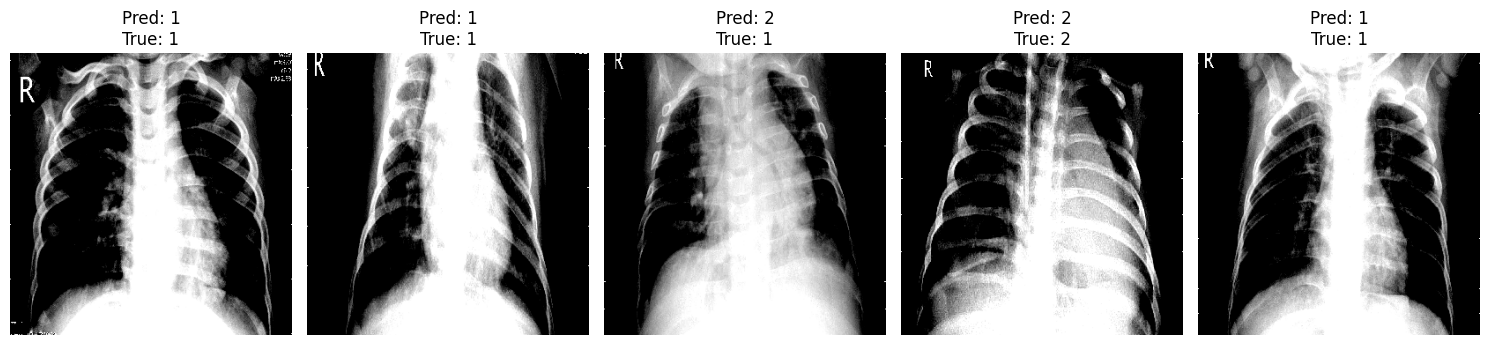

In [60]:
import numpy as np
import random
# Get one batch of images and labels from test_flow
images, labels = next(test_flow)

# Get predictions from the model
predictions = model1.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Get class names from the generator
class_labels = list(test_flow.class_indices.keys())

# Pick 5 random indices
random_indices = random.sample(range(len(images)), 5)

# Plot the images and predictions
plt.figure(figsize=(15, 7))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(f"Pred: {class_labels[predicted_classes[idx]]}\nTrue: {class_labels[true_classes[idx]]}")

plt.tight_layout()
plt.show()

In [8]:
#Model 2 (VGG16)
base_model1 = VGG16(include_top = False, weights = "imagenet", input_shape = (320, 320, 3), pooling = "max",
                    classes = 3)

#base_model1.load_weights("../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
base_model1.summary()


2025-04-16 03:17:42.322777: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-16 03:17:42.323221: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 320, 320, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 320, 320, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 160, 160, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 160, 160, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 80, 80, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 80, 80, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 80, 80, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 40, 40, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 40, 40, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 40, 40, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 40, 40, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 20, 20, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

model2 = Sequential()
model2.add(base_model1)
model2.add(Flatten())

model2.add(Dense(128, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

# Output layer for multi-class classification (3 classes)
model2.add(Dense(3, activation="softmax"))  # Changed to 3 units and softmax activation


# freeze the layers
for layer in base_model1.layers:
    layer.trainable = False

model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])



In [15]:

history = model2.fit(train_flow, epochs = 20, validation_data = val_flow, steps_per_epoch = 100,
                               callbacks = [early_stopping_callbacks])

/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.4661 - loss: 0.6511 - val_accuracy: 0.4797 - val_loss: 0.6173
Epoch 2/20
 33/100 ━━━━━━━━━━━━━━━━━━━━ 3:26 3s/step - accuracy: 0.5102 - loss: 0.6104

/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.5034 - loss: 0.6110 - val_accuracy: 0.4797 - val_loss: 0.6094
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.4782 - loss: 0.6073 - val_accuracy: 0.4797 - val_loss: 0.5931
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4632 - loss: 0.5976 - val_accuracy: 0.4797 - val_loss: 0.5894
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 409s 4s/step - accuracy: 0.4718 - loss: 0.5894 - val_accuracy: 0.4797 - val_loss: 0.5871
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.4942 - loss: 0.5783 - val_accuracy: 0.4797 - val_loss: 0.5721
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 406s 4s/step - accuracy: 0.4868 - loss: 0.5685 - val_accuracy: 0.4797 - val_loss: 0.5767
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4610 - loss: 0.5711 - val_accuracy: 0.4797 - val_loss: 0.5595
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 406s 4s/step - accuracy: 0.4816 - loss: 0.5587 - val_accuracy: 0.479

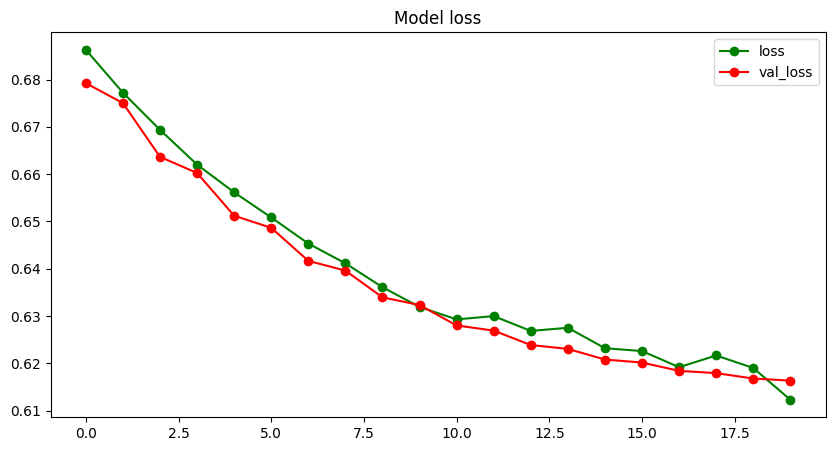

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()


In [21]:
test_loss, test_accuracy = model2.evaluate(test_flow, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7485 - loss: 0.5466 
The testing accuracy is:  69.87179517745972 %
The testing loss is:  52.58954167366028 %


/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2637424..3.371718].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3057933..2.099939].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3464267..1.8540707].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.553929..2.2135298].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.702548..2.3188672].


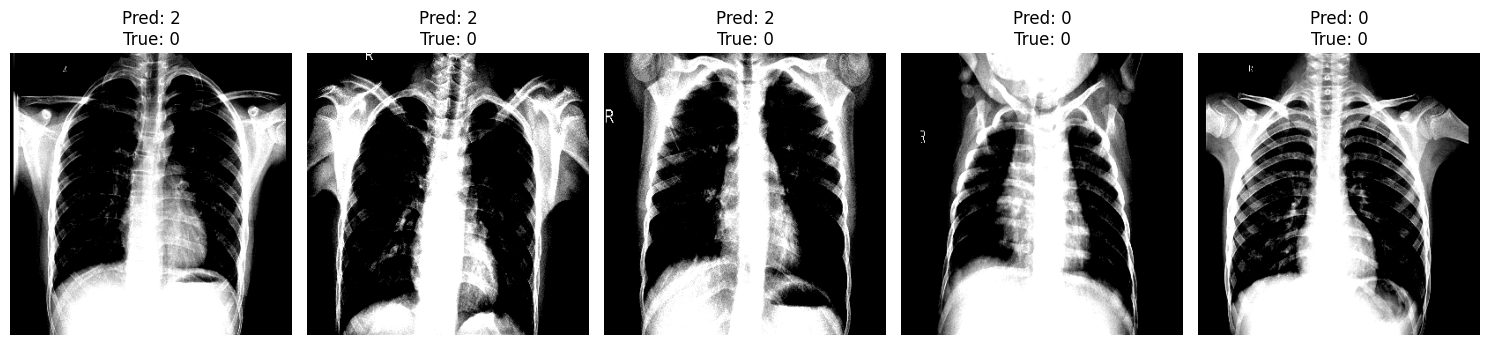

In [23]:
import numpy as np
import random
# Get one batch of images and labels from test_flow
images, labels = next(test_flow)

# Get predictions from the model
predictions = model2.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Get class names from the generator
class_labels = list(test_flow.class_indices.keys())

# Pick 5 random indices
random_indices = random.sample(range(len(images)), 5)

# Plot the images and predictions
plt.figure(figsize=(15, 7))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(f"Pred: {class_labels[predicted_classes[idx]]}\nTrue: {class_labels[true_classes[idx]]}")

plt.tight_layout()
plt.show()

In [ ]:
#RESNET50V2  Model

base_model2 = tensorflow.keras.applications.ResNet50V2(weights = "imagenet",
                                                       input_shape = (320, 320, 3),
                                                       pooling = "max", include_top = False,
                                                       classes = 3)

for layer in base_model2.layers:
    layer.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [17]:
model3 = Sequential()
model3.add(base_model2)
model3.add(Flatten())

model3.add(Dense(128, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

# Output layer for multi-class classification (3 classes)
model3.add(Dense(3, activation="softmax"))  # Changed to 3 units and softmax activation

# freeze the layers
for layer in base_model2.layers:
    layer.trainable = False

model3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history2 = model3.fit(train_flow, epochs = 20, validation_data = val_flow, steps_per_epoch = 100,
                              callbacks = [early_stopping_callbacks])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.4778 - loss: 0.6897 - val_accuracy: 0.4797 - val_loss: 0.6792
Epoch 2/20
 33/100 ━━━━━━━━━━━━━━━━━━━━ 1:21 1s/step - accuracy: 0.4988 - loss: 0.6777

/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 805ms/step - accuracy: 0.4856 - loss: 0.6774 - val_accuracy: 0.4797 - val_loss: 0.6750
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.4703 - loss: 0.6724 - val_accuracy: 0.4797 - val_loss: 0.6637
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 804ms/step - accuracy: 0.4827 - loss: 0.6621 - val_accuracy: 0.4797 - val_loss: 0.6602
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.4845 - loss: 0.6576 - val_accuracy: 0.4797 - val_loss: 0.6512
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 816ms/step - accuracy: 0.4693 - loss: 0.6511 - val_accuracy: 0.4797 - val_loss: 0.6487
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.4769 - loss: 0.6471 - val_accuracy: 0.4797 - val_loss: 0.6417
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 815ms/step - accuracy: 0.4730 - loss: 0.6416 - val_accuracy: 0.4797 - val_loss: 0.6396
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.4958 - loss: 0.6362 - val_accurac

In [22]:
test_loss, test_accuracy = model3.evaluate(test_flow, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 459ms/step - accuracy: 0.3181 - loss: 0.6564
The testing accuracy is:  38.78205120563507 %
The testing loss is:  63.895583152770996 %


/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0571926..1.9342804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7960788..1.9518487].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6831087..2.2568738].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8826861..1.8974016].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8622438..1.7266921].


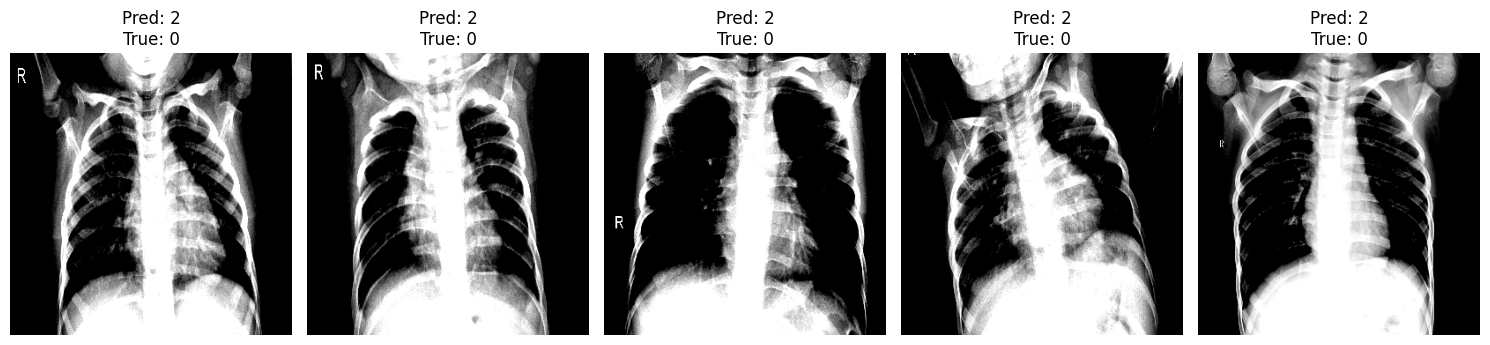

In [24]:
import numpy as np
import random
# Get one batch of images and labels from test_flow
images, labels = next(test_flow)

# Get predictions from the model
predictions = model3.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Get class names from the generator
class_labels = list(test_flow.class_indices.keys())

# Pick 5 random indices
random_indices = random.sample(range(len(images)), 5)

# Plot the images and predictions
plt.figure(figsize=(15, 7))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(f"Pred: {class_labels[predicted_classes[idx]]}\nTrue: {class_labels[true_classes[idx]]}")

plt.tight_layout()
plt.show()

In [ ]:
#Xception Model
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.applications import Xception
# Load the Xception base model without the top (classification) layer
base_model4 = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(320, 320, 3))

# Freeze the layers in the base model
base_model4.trainable = False

# Build Model 
model4 = Sequential()

# Base Model 
model4.add(base_model4)

# Batch Normalization
model4.add(BatchNormalization())

# Dropout Layer
model4.add(Dropout(0.45)) 

# Dense Layer 1
model4.add(Dense(220, activation='relu'))

# Dropout Layer
model4.add(Dropout(0.25)) 

# Dense Layer 2 
model4.add(Dense(60,activation='relu'))

# Output Layer
model4.add(Dense(1, activation='sigmoid'))

# Output layer for multi-class classification (3 classes)
model4.add(Dense(3, activation="softmax"))  # Changed to 3 units and softmax activation


# Compile
model4.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model4.summary()



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 220)            │       450,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 60)             │        13,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            61 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,333,779 (81.38 MB)

 Trainable params: 468,203 (1.79 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

In [35]:
#Xception
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Fitting Model
history4 = model4.fit(train_flow,
                        epochs= 20,
                        validation_data = val_flow,
                        callbacks = early_stopping)

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.6863 - loss: 0.6063 - val_accuracy: 0.6897 - val_loss: 0.5991
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.6958 - loss: 0.5940 - val_accuracy: 0.6821 - val_loss: 0.5879
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.6888 - loss: 0.5855 - val_accuracy: 0.6850 - val_loss: 0.5764
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.7127 - loss: 0.5648 - val_accuracy: 0.6935 - val_loss: 0.5645
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.7024 - loss: 0.5577 - val_accuracy: 0.6944 - val_loss: 0.5538
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.6855 - loss: 0.5502 - val_accuracy: 0.6935 - val_loss: 0.5444
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.6842 - loss: 0.5442 - val_accuracy: 0.6906 - val_loss: 0.5383
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.7013 - loss: 0.5322 - val_accu

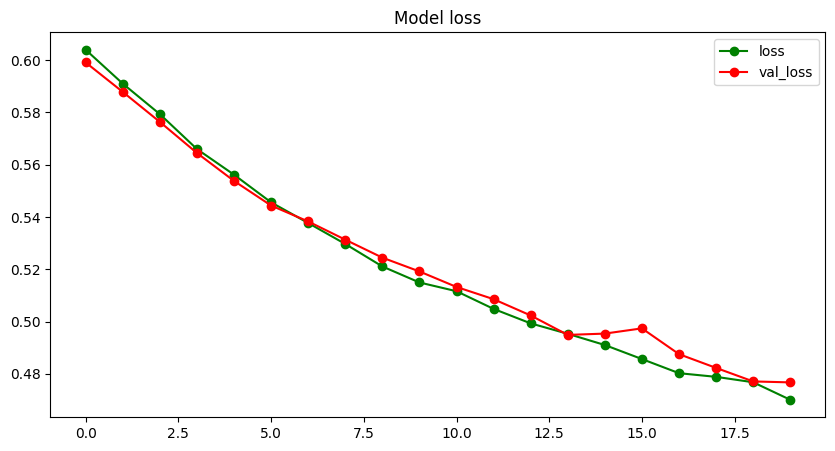

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history4.history["loss"], "go-")
plt.plot(history4.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

In [37]:
test_loss, test_accuracy = model4.evaluate(test_flow, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 615ms/step - accuracy: 0.7228 - loss: 0.4515
The testing accuracy is:  67.30769276618958 %
The testing loss is:  48.499634861946106 %


/home/evaberepiki/testfolder/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6736609..2.1643667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8861165..2.0993257].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9245603..2.1526818].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2351062..1.860977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1656725..2.1558535].


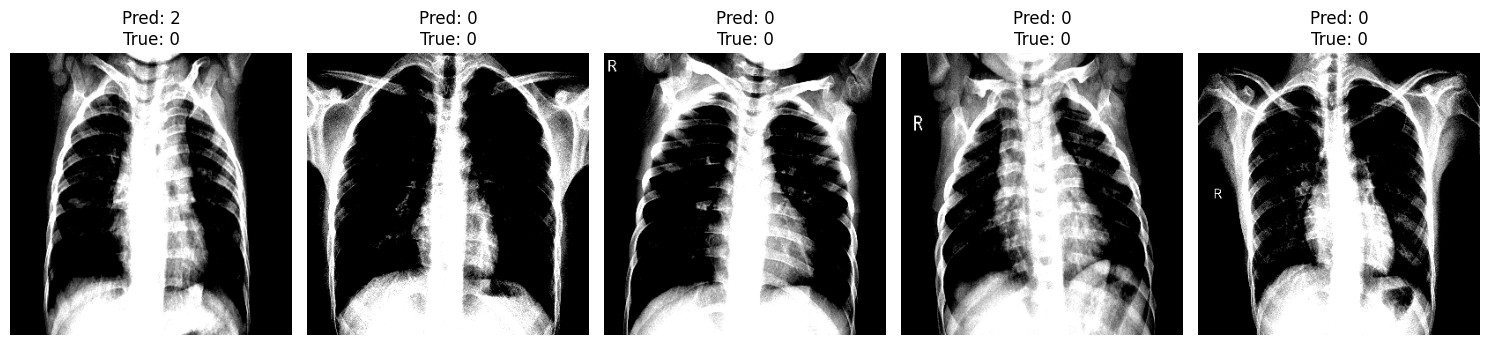

In [ ]:
import numpy as np
import random
# Get one batch of images and labels from test_flow
images, labels = next(test_flow)

# Get predictions from the model
predictions = model4.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Get class names from the generator
class_labels = list(test_flow.class_indices.keys())

# Pick 5 random indices
random_indices = random.sample(range(len(images)), 5)

# Plot the images and predictions
plt.figure(figsize=(15, 7))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(f"Pred: {class_labels[predicted_classes[idx]]}\nTrue: {class_labels[true_classes[idx]]}")

plt.tight_layout()
plt.show()